- X axis taken from index
- Y axis taken from data
- Legend is the column name (add title if needed)
- Labels are not added for x or y necessarily
- subplots=True , will plot "by" each column 
- line (default plot()) , histogram, pie, bar
- legend=True, if legend is needed

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [54]:
# Read a csv file. df stands for DataFrame
df = pd.read_csv('../height_weight.csv')
df

,sex,weight,height,repwt,repht
0,M,77,182,77.0,180.0
1,F,58,161,51.0,159.0
2,F,53,161,54.0,158.0
3,M,68,177,70.0,175.0
4,F,59,157,59.0,155.0
...,...,...,...,...,...
195,M,74,175,71.0,175.0
196,M,83,180,80.0,180.0
197,M,81,175,NaN,NaN
198,M,90,181,91.0,178.0


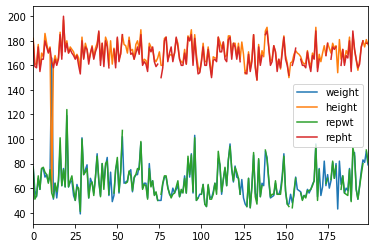

In [7]:
# notice the object reference is also being printed
df.plot()

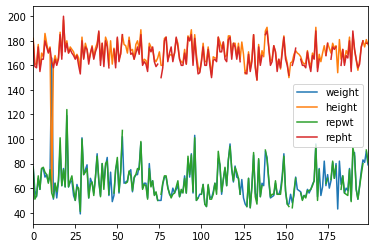

In [8]:
# assign to remove object reference. Index is used for x axis, and each column is plotted on y axis
ax = df.plot()

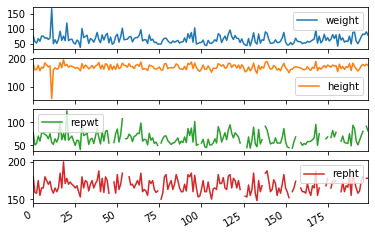

In [9]:
# subplots to put each column in its own plot 
ax = df.plot(subplots=True)

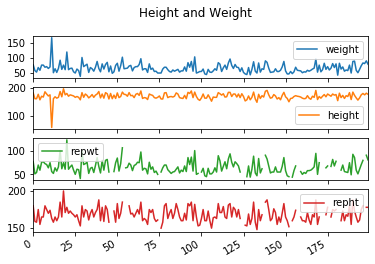

In [10]:
# Add a title 
ax = df.plot(subplots=True, title="Height and Weight")

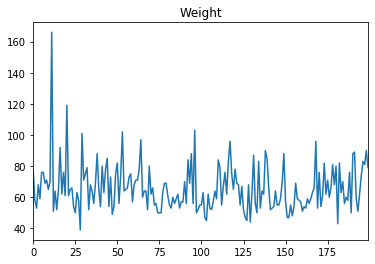

In [13]:
# plot specific column (observe how legend is not present when a column is selected, hence title helps)
ax = df['weight'].plot(title="Weight")

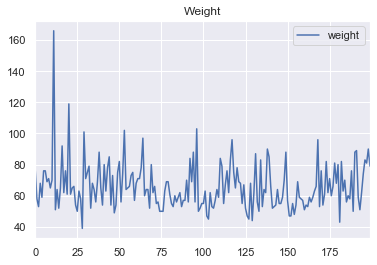

In [55]:
# or just use legend=True
ax = df['weight'].plot(title="Weight", legend=True)

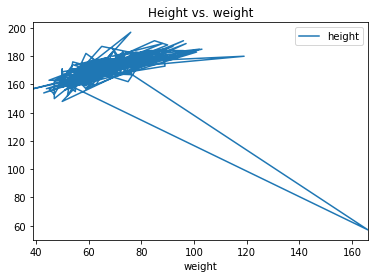

In [16]:
# Lets change x axis and not taking default index of dataframe. Lets say we want to plot height corresponding to weight
ax = df.plot(title="Height vs. weight", x='weight', y='height')

# Histogram

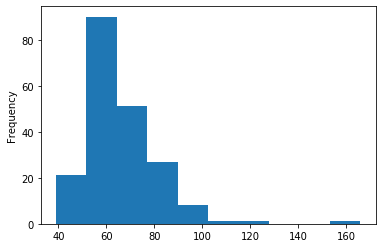

In [17]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.hist.html
ax = df['weight'].plot.hist()

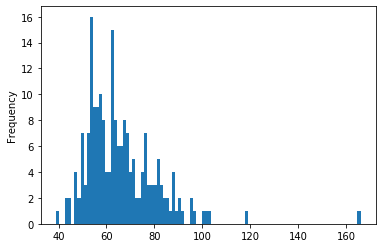

In [18]:
# Increase bins to spread out points, otherwise hist() will stuff all bars together like the above one
ax = df['weight'].plot.hist(bins=100)

# Box plot

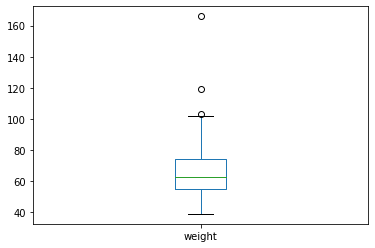

In [19]:
# In descriptive statistics, a box plot or boxplot is a method for graphically depicting groups of 
# numerical data through their quartiles. Box plots may also have lines extending vertically from the boxes (whiskers) indicating variability outside the upper and lower quartiles, 
# hence the terms box-and-whisker plot and box-and-whisker diagram. 
ax = df['weight'].plot.box()

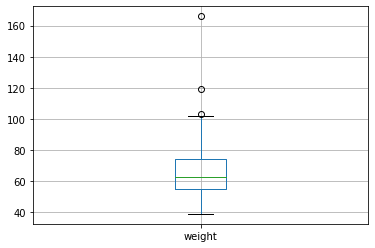

In [20]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html
ax = df.boxplot(column=['weight'])

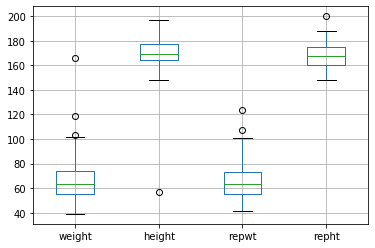

In [21]:
ax = df.boxplot(column=['weight','height','repwt','repht'])

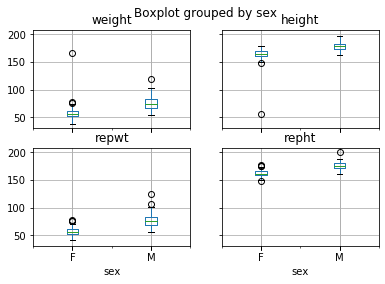

In [22]:
ax = df.boxplot(column=['weight','height','repwt','repht'], by='sex')

# Pie Chart

In [23]:
df = pd.read_csv('../Real_Estate_Sales_2001-2017.csv')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 861597 entries, 0 to 861596
Data columns (total 13 columns):
ID                 861597 non-null int64
SerialNumber       861597 non-null int64
ListYear           861597 non-null int64
DateRecorded       861589 non-null object
Town               861597 non-null object
Address            861546 non-null object
AssessedValue      861293 non-null float64
SaleAmount         830805 non-null float64
SalesRatio         860764 non-null float64
PropertyType       812319 non-null object
ResidentialType    648400 non-null object
NonUseCode         522585 non-null object
Remarks            120768 non-null object
dtypes: float64(3), int64(3), object(7)
memory usage: 85.5+ MB


In [25]:
df['ListYear'].unique()

array([2017, 2009, 2014, 2008, 2015, 2002, 2003, 2004, 2007, 2013, 2005,
       2010, 2012, 2011, 2001, 2006, 2016])

In [27]:
df_share_by_year = df['ListYear'].value_counts()
df_share_by_year

2002    106068
2004     84056
2003     64239
2005     61602
2001     59584
2016     49773
2014     49563
2006     48775
2015     46651
2017     45692
2009     42508
2013     39943
2012     35973
2007     35616
2008     32734
2011     31065
2010     27755
Name: ListYear, dtype: int64

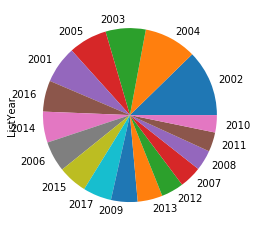

In [28]:
df_share_by_year.plot.pie()

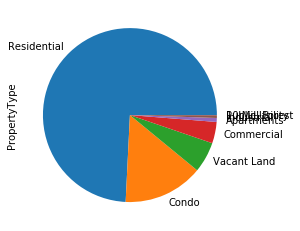

In [31]:
df['PropertyType'].value_counts().plot.pie()

# Bar graph

In [32]:
top_5 = df_share_by_year[:5]

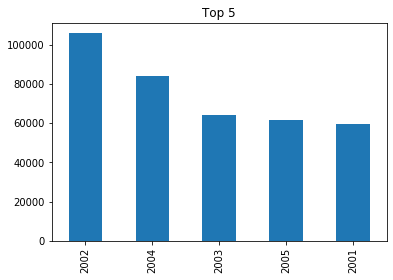

In [33]:
top_5.plot.bar(title='Top 5')

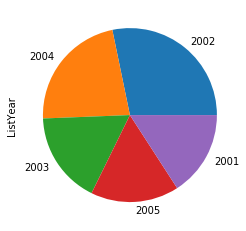

In [35]:
top_5.plot.pie()

# Excercises with Real estate data

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 861597 entries, 0 to 861596
Data columns (total 13 columns):
ID                 861597 non-null int64
SerialNumber       861597 non-null int64
ListYear           861597 non-null int64
DateRecorded       861589 non-null object
Town               861597 non-null object
Address            861546 non-null object
AssessedValue      861293 non-null float64
SaleAmount         830805 non-null float64
SalesRatio         860764 non-null float64
PropertyType       812319 non-null object
ResidentialType    648400 non-null object
NonUseCode         522585 non-null object
Remarks            120768 non-null object
dtypes: float64(3), int64(3), object(7)
memory usage: 85.5+ MB


In [44]:
# What is the average value by PropertyType ?
averages = df.groupby(['PropertyType']).mean().reset_index()
averages

,PropertyType,ID,SerialNumber,ListYear,AssessedValue,SaleAmount,SalesRatio
0,10 Mill Forest,405484.545455,59176.363636,2010.000000,8.315909e+04,1.830160e+05,0.501271
1,Apartments,417406.913935,117574.397210,2008.322911,8.732501e+05,1.198831e+06,1836.996471
2,Commercial,393078.379084,101290.685512,2008.226458,1.485650e+06,1.042632e+06,2694.755727
3,Condo,402198.107112,69686.820822,2005.304917,1.290439e+05,2.142420e+05,336.522156
4,Industrial,374978.978713,86195.514949,2007.852188,7.285687e+05,9.971568e+05,86.362072
5,Public Utility,401877.602837,75075.773050,2005.581560,5.835741e+05,2.227996e+05,205.041414
6,Residential,411161.215243,116144.051129,2007.890536,2.219131e+05,3.519694e+05,823.361179
7,Vacant Land,395270.531517,92476.796272,2005.822008,1.110980e+05,1.983576e+05,333.556047


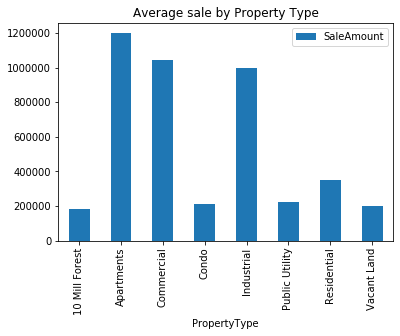

In [48]:
ax = averages.plot.bar(title='Average sale by Property Type',x='PropertyType',y='SaleAmount')

# Horizontal Bar plot

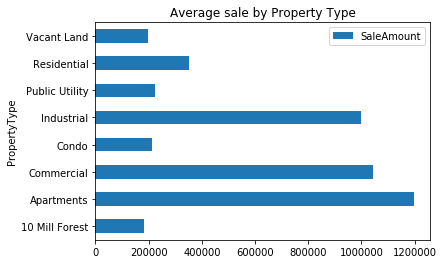

In [50]:
ax = averages.plot.barh(title='Average sale by Property Type',x='PropertyType',y='SaleAmount')

# Multiple bars (comparitive)

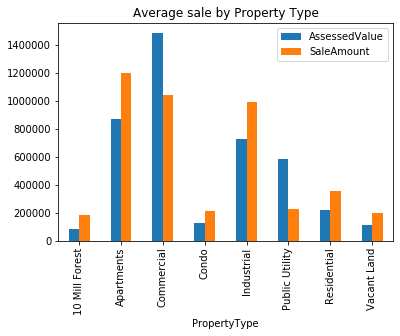

In [51]:
ax = averages.plot.bar(title='Average sale by Property Type',x='PropertyType',y=['AssessedValue','SaleAmount'])

# Stacked Bar Chart (using seaborn)

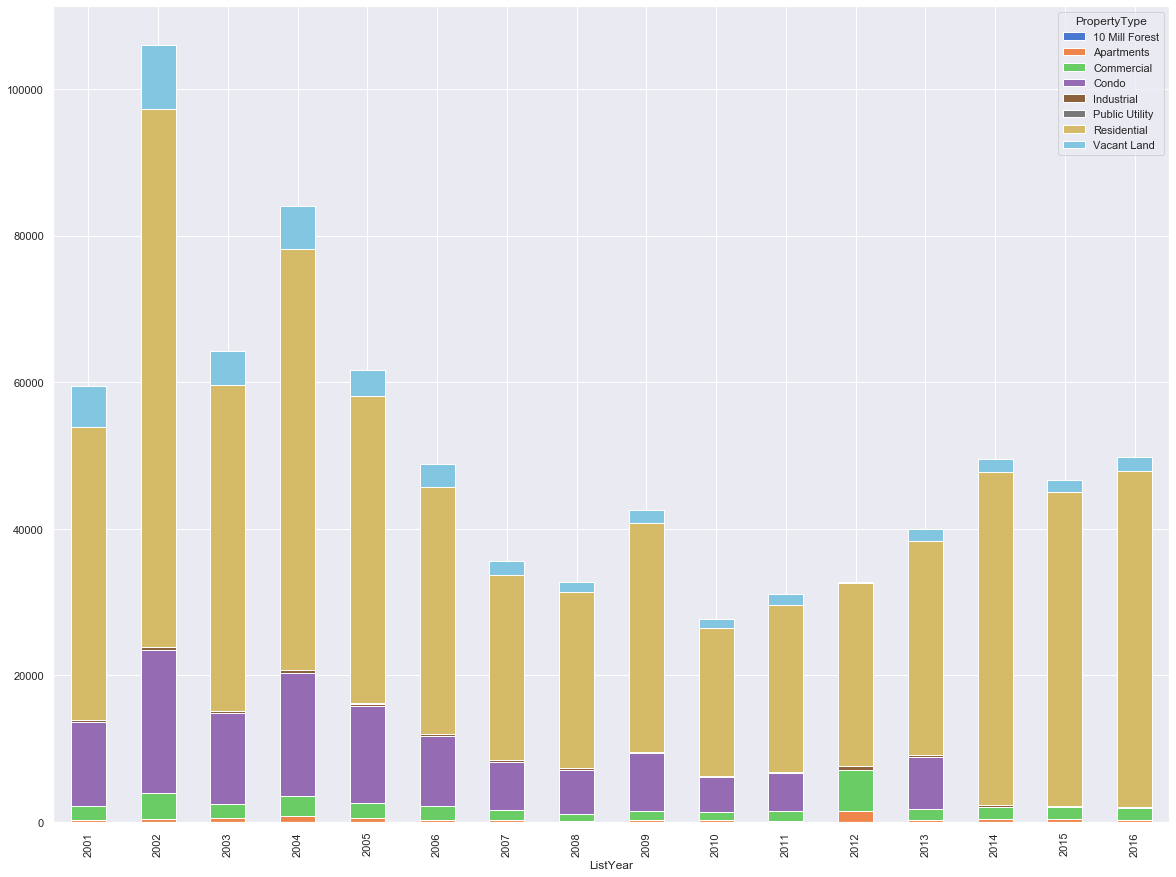

In [52]:
from matplotlib.colors import ListedColormap
import seaborn as sns
sns.set()
df.groupby(['ListYear','PropertyType']).size().unstack().plot(kind='bar', stacked=True,colormap=ListedColormap(sns.color_palette("muted")), 
          figsize=(20,15))